In [14]:
import pandas as pd
csvFile= pd.read_csv('/home/sanatan-7/Softmaxai/Clinic C Test Data-20230816T102324Z-001/Clinic C Test Data/Clinic C Test Data Historical Purchase 2yr.csv')

print(csvFile.columns)

Index(['Vetcove ID', 'Date', 'Hospital', 'Name', 'Order #', 'PO Number',
       'Supplier', 'Manufacturer', 'Manufacturer Number', 'Primary Category',
       'Secondary Category', 'Vetcove Item ID', 'Cost per Dose', 'Units',
       'Unit Price', 'Unit Measurement', 'List Price', 'Quantity',
       'Total Price', 'Item Status', 'Supplier's SKU'],
      dtype='object')


In [15]:
csvFile['Date'] = pd.to_datetime(csvFile['Date'])  # Convert 'Date' column to datetime if needed
df = csvFile.sort_values(by='Date')

In [16]:
df = df.dropna()

In [17]:
unique_medicine = df['Name'].value_counts()
unique_medicine = unique_medicine[unique_medicine >= 25]

print(unique_medicine)
print(len(unique_medicine))

Name
VetriJec Soft Pack Luer Lock Syringe with Tri-Beveled Needle: Grey, 3cc, 22g x 0.75", 100 Count    63
Apoquel Tablets: 16mg, 250 Count                                                                   58
Vetsulin: U-40, 10ml                                                                               55
Aurocin Ear Cleanser with Aloe (Cucumber Melon Scent): 8oz                                         48
Novox Caplets: 100mg, 180 Count                                                                    46
Gabapentin Capsules: 100mg, 500 Count                                                              45
TruCan BAPi (IN): 25 Doses                                                                         44
IDEXX Specimen Bag (Plastic): Each                                                                 43
Avant Non-Woven Sponge: 4-Ply, 3" x 3", 200 Count                                                  43
Fecal Specimen Collection Container: 30mL                                    

In [18]:
medicine_1 = df[df['Name'] == 'VetriJec Soft Pack Luer Lock Syringe with Tri-Beveled Needle: Grey, 3cc, 22g x 0.75", 100 Count']
print(medicine_1)

      Vetcove ID       Date  Hospital  \
30     150811546 2021-08-18  Clinic C   
2846   150811498 2021-08-24  Clinic C   
86     152189757 2021-09-21  Clinic C   
2911   155238037 2021-10-05  Clinic C   
136    157423496 2021-10-15  Clinic C   
...          ...        ...       ...   
2743   280973531 2023-06-26  Clinic C   
1392   282162442 2023-06-30  Clinic C   
1415   284723874 2023-07-13  Clinic C   
4253   288120976 2023-07-27  Clinic C   
4410   289532369 2023-08-03  Clinic C   

                                                   Name   Order #  \
30    VetriJec Soft Pack Luer Lock Syringe with Tri-...  40269473   
2846  VetriJec Soft Pack Luer Lock Syringe with Tri-...  40375171   
86    VetriJec Soft Pack Luer Lock Syringe with Tri-...  40871574   
2911  VetriJec Soft Pack Luer Lock Syringe with Tri-...  41135539   
136   VetriJec Soft Pack Luer Lock Syringe with Tri-...  41312652   
...                                                 ...       ...   
2743  VetriJec Soft Pack

In [19]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through columns and apply label encoding to non-numeric columns
for column in medicine_1.columns:
    if column != 'Date':
        if medicine_1[column].dtype == 'object' or medicine_1[column].dtype.name == 'category':
            medicine_1[column] = label_encoder.fit_transform(medicine_1[column])

# Display the modified DataFrame
print(medicine_1)

      Vetcove ID       Date  Hospital  Name  Order #  PO Number  Supplier  \
30     150811546 2021-08-18         0     0        0          0         0   
2846   150811498 2021-08-24         0     0        1          0         0   
86     152189757 2021-09-21         0     0        2          1         0   
2911   155238037 2021-10-05         0     0        3          3         0   
136    157423496 2021-10-15         0     0        4          4         0   
...          ...        ...       ...   ...      ...        ...       ...   
2743   280973531 2023-06-26         0     0       56         55         0   
1392   282162442 2023-06-30         0     0       57         56         0   
1415   284723874 2023-07-13         0     0       58         59         0   
4253   288120976 2023-07-27         0     0       59         57         0   
4410   289532369 2023-08-03         0     0       60         58         0   

      Manufacturer  Manufacturer Number  Primary Category  ...  \
30       

/tmp/ipykernel_40793/4167655737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medicine_1[column] = label_encoder.fit_transform(medicine_1[column])
/tmp/ipykernel_40793/4167655737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medicine_1[column] = label_encoder.fit_transform(medicine_1[column])
/tmp/ipykernel_40793/4167655737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [20]:
target_feature = 'Quantity'

# Calculate the correlation matrix
correlation_matrix = medicine_1.corr()

# Extract the correlations of the target feature with other features
correlation_with_target = correlation_matrix[target_feature]

# Display the correlations
print(correlation_with_target)

Vetcove ID            -0.084419
Date                  -0.087945
Hospital                    NaN
Name                        NaN
Order #               -0.089310
PO Number             -0.011451
Supplier                    NaN
Manufacturer                NaN
Manufacturer Number         NaN
Primary Category            NaN
Secondary Category          NaN
Vetcove Item ID             NaN
Cost per Dose         -0.101695
Units                       NaN
Unit Price                  NaN
Unit Measurement            NaN
List Price                  NaN
Quantity               1.000000
Total Price                 NaN
Item Status           -0.275876
Supplier's SKU              NaN
Name: Quantity, dtype: float64


In [21]:
selected_columns = ['Date','Quantity']
final_medicine_1 = medicine_1[selected_columns]
final_medicine_1['Date']=pd.to_datetime(final_medicine_1['Date'])
final_medicine_1.set_index('Date', inplace=True)
print(final_medicine_1.head())

            Quantity
Date                
2021-08-18       3.0
2021-08-24       3.0
2021-09-21       2.0
2021-10-05       2.0
2021-10-15       3.0


/tmp/ipykernel_40793/3279079137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_medicine_1['Date']=pd.to_datetime(final_medicine_1['Date'])


In [22]:
df_weekly = final_medicine_1.resample('W').sum()
print(df_weekly)

            Quantity
Date                
2021-08-22       3.0
2021-08-29       3.0
2021-09-05       0.0
2021-09-12       0.0
2021-09-19       0.0
...              ...
2023-07-09       0.0
2023-07-16       3.0
2023-07-23       0.0
2023-07-30       2.0
2023-08-06       4.0

[103 rows x 1 columns]


In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_weekly['Quantity'])
p_value = result[1]

if p_value <= 0.05:
    print("Data is not stationary")
else:
    print("Data is stationary")

Data is stationary


<Axes: xlabel='Date'>

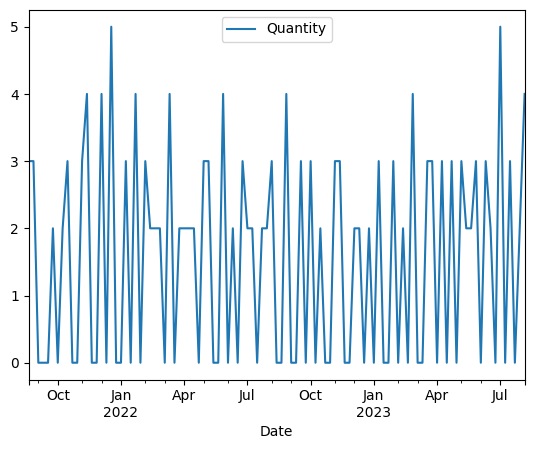

In [24]:
df_weekly.plot()

In [25]:
# Split the data into training and test sets (80% train, 20% test)
train_size = int(0Lock.8 * len(df_weekly))
train_data, test_data = df_weekly.iloc[:train_size], df_weekly.iloc[train_size:]

SyntaxError: invalid decimal literal (2211359700.py, line 2)